<a href="https://colab.research.google.com/github/Davron030901/PyTorch/blob/main/Pre_trained_Model_VGG11_for_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pre-trained model VGG11

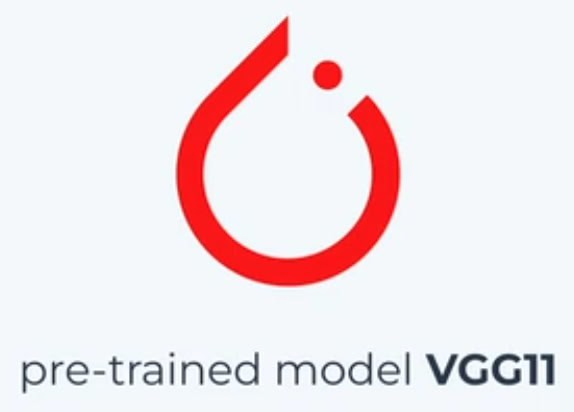

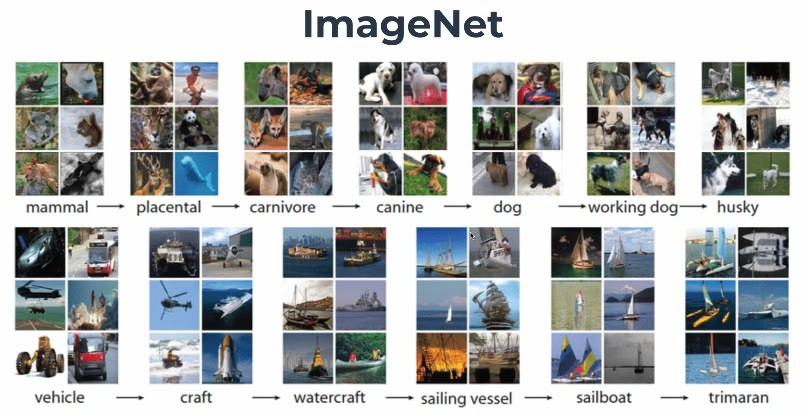

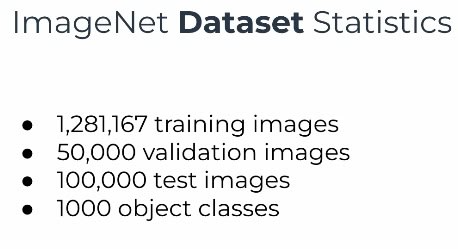

Torch vision models
https://pytorch.org/vision/main/models/generated/torchvision.models.vgg11.html#torchvision.models.vgg11

In [ ]:
!wget -O cat.jpg https://t4.ftcdn.net/jpg/00/97/58/97/360_F_97589769_t45CqXyOKXwoBZT9PRaWGHRk5hQqQ.jpg

--2025-02-01 06:15:50--  https://t4.ftcdn.net/jpg/00/97/58/97/360_F_97589769_t45CqXyOKXwoBZT9PRaWGHRk5hQqQ.jpg
Resolving t4.ftcdn.net (t4.ftcdn.net)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to t4.ftcdn.net (t4.ftcdn.net)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40670 (40K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>]  39.72K  --.-KB/s    in 0.01s   

2025-02-01 06:15:50 (3.71 MB/s) - ‘cat.jpg’ saved [40670/40670]



In [ ]:
import torchvision.models as models
from PIL import Image
import torch

from torchvision import transforms

In [ ]:
weights=models.VGG11_Weights.IMAGENET1K_V1
model =models.vgg11(weights=weights)

Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth
100%|██████████| 507M/507M [00:02<00:00, 204MB/s]


In [ ]:
categories=weights.meta['categories']
print(categories)

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snake', 'horned viper', 'diamondback', 

In [ ]:
#Define the preprocessing function
def preprocess_image(img_path):
    # Open the image file
    img = Image.open(img_path).convert('RGB')

    # Define the transformations: resize to 224x224 , convert to tensor, and normalize
    preprocess=transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    #Preprocess the image
    input_tensor = preprocess(img)

    # Add an eztra batch dimension as the model expects a batch of images list ko'rinishga olib keladi
    input_batch = input_tensor.unsqueeze(0)

    return input_batch

In [ ]:
input_image = preprocess_image('/content/cat.jpg')
print(input_image.shape)

torch.Size([1, 3, 224, 224])


In [ ]:
output=model(input_image)
print(output.size())

torch.Size([1, 1000])


In [ ]:
class_idx = torch.argmax(output).item()
print(class_idx)
print(categories[class_idx])

281
tabby


In [ ]:
!wget -O cat.jpg https://t4.ftcdn.net/jpg/00/97/58/97/360_F_97589769_t45CqXyOKXwoBZT9PRaWGHRk5hQqQ.jpg
weights=models.VGG11_Weights.IMAGENET1K_V1
model =models.vgg11(weights=weights)
categories=weights.meta['categories']
print(categories)
#Define the preprocessing function
def preprocess_image(img_path):
    # Open the image file
    img = Image.open(img_path).convert('RGB')

    # Define the transformations: resize to 224x224 , convert to tensor, and normalize
    preprocess=transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    #Preprocess the image
    input_tensor = preprocess(img)

    # Add an eztra batch dimension as the model expects a batch of images list ko'rinishga olib keladi
    input_batch = input_tensor.unsqueeze(0)

    return input_batch
input_image = preprocess_image('/content/cat.jpg')
print(input_image.shape)
output=model(input_image)
print(output.size())
class_idx = torch.argmax(output).item()
print(class_idx)
categories[class_idx]


--2025-02-01 06:29:19--  https://t4.ftcdn.net/jpg/00/97/58/97/360_F_97589769_t45CqXyOKXwoBZT9PRaWGHRk5hQqQ.jpg
Resolving t4.ftcdn.net (t4.ftcdn.net)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to t4.ftcdn.net (t4.ftcdn.net)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40670 (40K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>]  39.72K  --.-KB/s    in 0.01s   

2025-02-01 06:29:20 (3.39 MB/s) - ‘cat.jpg’ saved [40670/40670]

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turt

'tiger cat'